In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from anomalydetector_evt.SPOT import SPOT
from anomalydetector_evt.DSPOT import DSPOT

### CASO 1

El conjunto datos es del uso de la CPU de un servidor de Amazon en el centro de datos de la Costa Este. El conjunto de datos termina con un fallo completo del sistema, que fue el resultado de un fallo documentado de los servidores de la API de AWS.

In [2]:
datos = pd.read_csv('iio_us-east-1_i-a2eb1cd9_NetworkIn.csv')
datos = datos.sort_index(ascending=False).reset_index().value

In [3]:
n_init =  round(len(datos) * 0.1) # 30% para entrenamiento
data_init = datos[:n_init]

# Creamos la clase para detectar anomalías
anomalydetector = DSPOT(data_init, p=0.975, q=5e-4, d=12)

# Iniciamos (POT)
anomalydetector.init()

# Guardar el número de veces que no se encontró solución
excs = []

x = [] # indices de las anomalías
for i in range(n_init, len(datos)):

    try:
        # Nuevo valor
        new_value = datos[i]

        # Verificar anomalía
        anomalia = anomalydetector.update(new_value)

        # Si hay anomalía se guarda el índice (para el gráfico)
        if anomalia:
            x.append(i)

    # Si no existe solución 
    except Exception as e:
        excs += [i]
        print(e)

[]

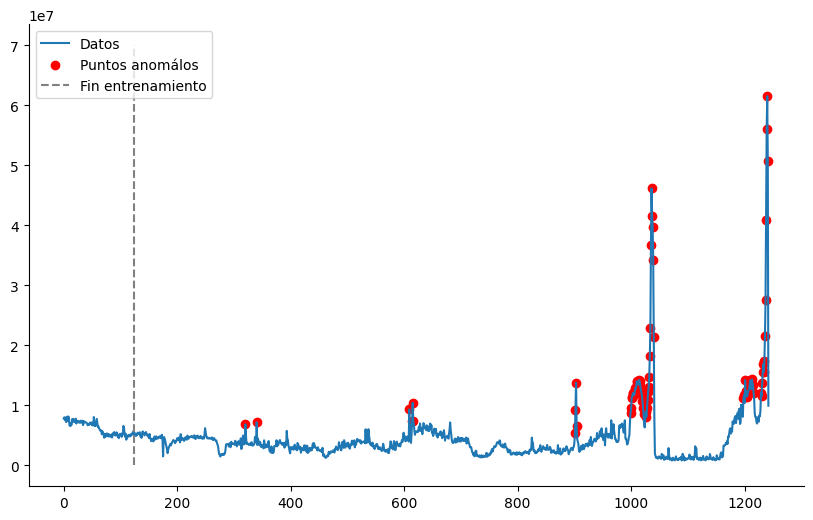

In [4]:
plt.figure(figsize=(10, 6))

plt.plot(datos, label = 'Datos')
plt.scatter(x=x, y=anomalydetector.A, marker='o', color='red', label='Puntos anomálos')
plt.vlines(x=n_init, ymin=0, ymax=7e7, color='gray', linestyle='dashed', label='Fin entrenamiento')

# Obtener los ejes actuales
ax = plt.gca()

# Ocultar las espinas (bordes) del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend()
plt.plot()

## CASO 2

El conjunto proviene de las métricas del servidor de AWS recopiladas por el servicio Amazon CloudWatch. Ejemplos de métricas incluyen Utilización de CPU, Bytes de Entrada y Bytes de Lectura de Disco. En este caso se trata de los Bytes de Entrada. 

In [5]:
datos2 = pd.read_csv('ec2_request_latency_system_failure.csv')
datos2 = datos2.value

In [6]:
n_init = round(len(datos2) * 0.1) # 10% para entrenamiento
data_init = datos2[:n_init]

# Creamos la clase para detectar anomalías
anomalydetector = SPOT(data_init, p=0.98, q=5e-4)

# Iniciamos (POT)
anomalydetector.init()

# Guardar el número de veces que no se encontró solución
excs = []

x = [] # indices de las anomalías
for i in range(n_init, len(datos2)):

    try:
        # Nuevo valor
        new_value = datos2[i]

        # Verificar anomalía
        anomalia = anomalydetector.update(new_value)

        # Si hay anomalía se guarda el índice (para el gráfico)
        if anomalia:
            x.append(i)

    # Si no existe solución 
    except Exception as e:
        excs += [i]

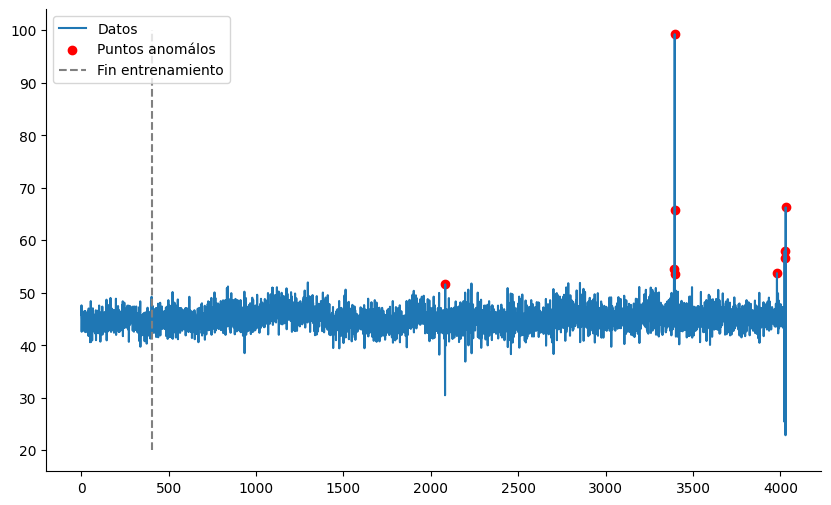

In [7]:
plt.figure(figsize=(10, 6))

plt.plot(datos2, label = 'Datos')
plt.scatter(x=x, y=anomalydetector.A, marker='o', color='r', label='Puntos anomálos')
plt.vlines(x=n_init, ymin=20, ymax=100, color='gray', linestyle='dashed', label='Fin entrenamiento')

# Obtener los ejes actuales
ax = plt.gca()

# Ocultar las espinas (bordes) del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend()